In [2]:
# written by dr.haol
# haolll@swu.edu.cn

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load and attach add-on packages
from math import pi
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt

In [2]:
# Read result file (.csv) of basic information
res_behav_Child = pd.read_csv('D:/OneDrive/Research/2018_Hao_AttenNeuroDev/Results/NewSample/basic_CBDC_img5.csv')
res_behav_Adult = pd.read_csv('D:/OneDrive/Research/2018_Hao_AttenNeuroDev/Results/NewSample/basic_CBDA_img5.csv')

# Read result file (.csv) of beta value
res_beta_A = pd.read_csv('D:/OneDrive/Research/2018_Hao_AttenNeuroDev/Codes/ROIsAnaly/res_extrmean_c1A_con_NewSample.csv')
res_beta_O = pd.read_csv('D:/OneDrive/Research/2018_Hao_AttenNeuroDev/Codes/ROIsAnaly/res_extrmean_c2O_con_NewSample.csv')
res_beta_C = pd.read_csv('D:/OneDrive/Research/2018_Hao_AttenNeuroDev/Codes/ROIsAnaly/res_extrmean_c3E_con_NewSample.csv')

In [3]:
# Define the drawing function
# Drawing parameters: index of region of interest (ROI) in results file, name of ROI will present on figure, 
#                     minimum value of y axis and max value of y axis
def radar_hao_ca(rois, roiname, lmin, lmax):
    # Convert the read data into a format recognized by the package
    res_CA = pd.merge(res_behav_Child, res_beta_A, how = 'inner', on = "Scan_ID")
    res_CO = pd.merge(res_behav_Child, res_beta_O, how = 'inner', on = "Scan_ID")
    res_CC = pd.merge(res_behav_Child, res_beta_C, how = 'inner', on = "Scan_ID")
    res_C = pd.DataFrame([np.mean(res_CA[rois]),np.mean(res_CO[rois]),np.mean(res_CC[rois])])
    res_AA = pd.merge(res_behav_Adult, res_beta_A, how = 'inner', on = "Scan_ID")
    res_AO = pd.merge(res_behav_Adult, res_beta_O, how = 'inner', on = "Scan_ID")
    res_AC = pd.merge(res_behav_Adult, res_beta_C, how = 'inner', on = "Scan_ID")
    res_A = pd.DataFrame([np.mean(res_AA[rois]),np.mean(res_AO[rois]),np.mean(res_AC[rois])])
    
    # Set the figure size
    fig_set = mplt.figure(figsize=(14, 6))
    ## PART 1: Create background
    # number of variable
    N = len(list(res_C)[0:])
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    # Initialise the spider plot
    ax = mplt.subplot(121, polar=True)
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels labels yet
    mplt.xticks(angles, roiname, rotation='vertical', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    mplt.yticks([0,10], color="black", size=15)
    mplt.ylim(lmin,lmax)

    ## PART 2: Add plots
    values = res_C.loc[0].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Alert", color="lightcoral")

    values = res_C.loc[1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Orient", color="yellowgreen")
    
    values = res_C.loc[2].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Conflict", color="deepskyblue")
    #mplt.legend(loc='best', bbox_to_anchor=(0, 0))
    
    # Initialise the spider plot
    ax = mplt.subplot(122, polar=True)
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels labels yet
    mplt.xticks(angles, roiname, rotation='vertical', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    mplt.yticks([0,10], color="black", size=15)
    mplt.ylim(lmin,lmax)

    ## PART 2: Add plots
    values = res_A.loc[0].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Alerting", color="lightcoral")

    values = res_A.loc[1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Orienting", color="yellowgreen")

    values = res_A.loc[2].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Executive", color="deepskyblue")
    
    mplt.legend(loc='best', fontsize=15, bbox_to_anchor=(0.1, 0.1))
    mplt.savefig("C:/Users/haolei/Desktop/radar_ca.png", dpi=600, transparent=True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\si

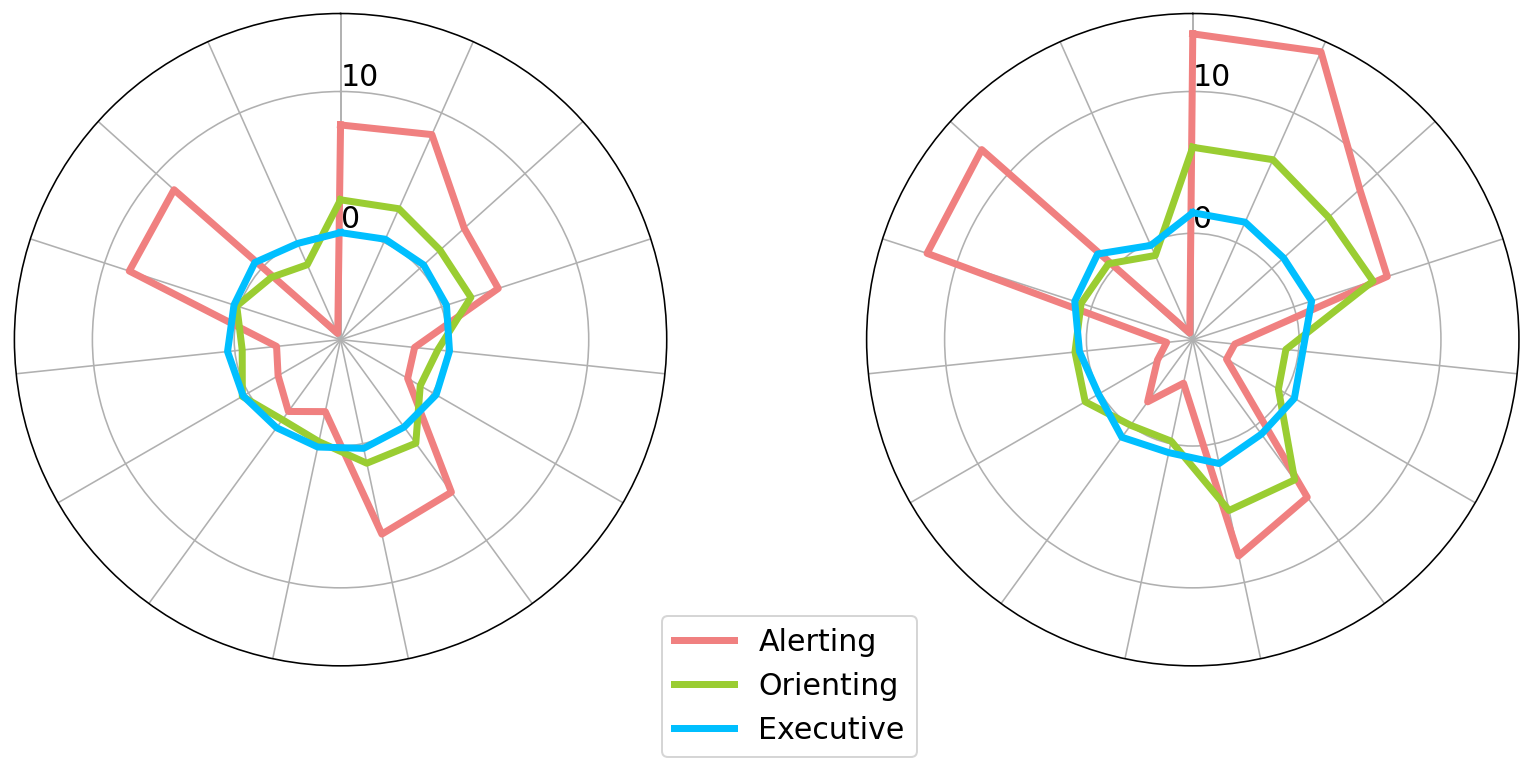

In [4]:
# The name of ROIs
rois = [
    "ROI_FF_Mcond_r01_spl_l", "ROI_FF_Mcond_r02_spl_r",
    "ROI_FF_Mcond_r03_fef_l", "ROI_FF_Mcond_r04_fef_r",
    "ROI_FF_Mcond_r05_tpj_l", "ROI_FF_Mcond_r06_tpj_r",
    "ROI_FF_Mcond_r07_vfc_l", "ROI_FF_Mcond_r08_vfc_r",
    "ROI_FF_Mcond_r09_dacc_l", "ROI_FF_Mcond_r10_dacc_r",
    "ROI_FF_Mcond_r11_ai_l", "ROI_FF_Mcond_r12_ai_r",
    "ROI_FF_Mcond_r13_lo_l", "ROI_FF_Mcond_r14_lo_r",
    "ROI_FF_Mcond_r15_cuneus_b"]
roiname = []

# Drawing parameters: index of region of interest (ROI) in results file, name of ROI will present on figure, 
#                     minimum value of y axis and max value of y axis
radar_hao_ca(rois, roiname, -7.5, 15.5)

In [5]:
def radar_hao_c(rois,roiname,lmin,lmax):
    res_CA = pd.merge(res_behav_Child, res_beta_A, how='inner', on = "Scan_ID")
    res_CO = pd.merge(res_behav_Child, res_beta_O, how='inner', on = "Scan_ID")
    res_CC = pd.merge(res_behav_Child, res_beta_C, how='inner', on = "Scan_ID")
    res_C = pd.DataFrame([np.mean(res_CA[rois]),np.mean(res_CO[rois]),np.mean(res_CC[rois])])
    
    
    fig_set = mplt.figure(figsize=(8,8))
    ## PART 1: Create background
    # number of variable
    N = len(list(res_C)[0:])
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    # Initialise the spider plot
    ax = mplt.subplot(111, polar=True)
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels labels yet
    mplt.xticks(angles, roiname, rotation='vertical', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    mplt.yticks([0,10], color="black", size=15)
    mplt.ylim(lmin,lmax)

    ## PART 2: Add plots
    values = res_C.loc[0].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Alert", color="lightcoral")

    values = res_C.loc[1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Orient", color="yellowgreen")
    
    values = res_C.loc[2].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Executive", color="deepskyblue")
    #mplt.legend(loc='best', bbox_to_anchor=(0, 0))
    
    #mplt.legend(loc='best', fontsize=15, bbox_to_anchor=(0, 0))
    mplt.savefig("C:/Users/haolei/Desktop/radar_c.png", dpi=600, transparent=True)
    

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


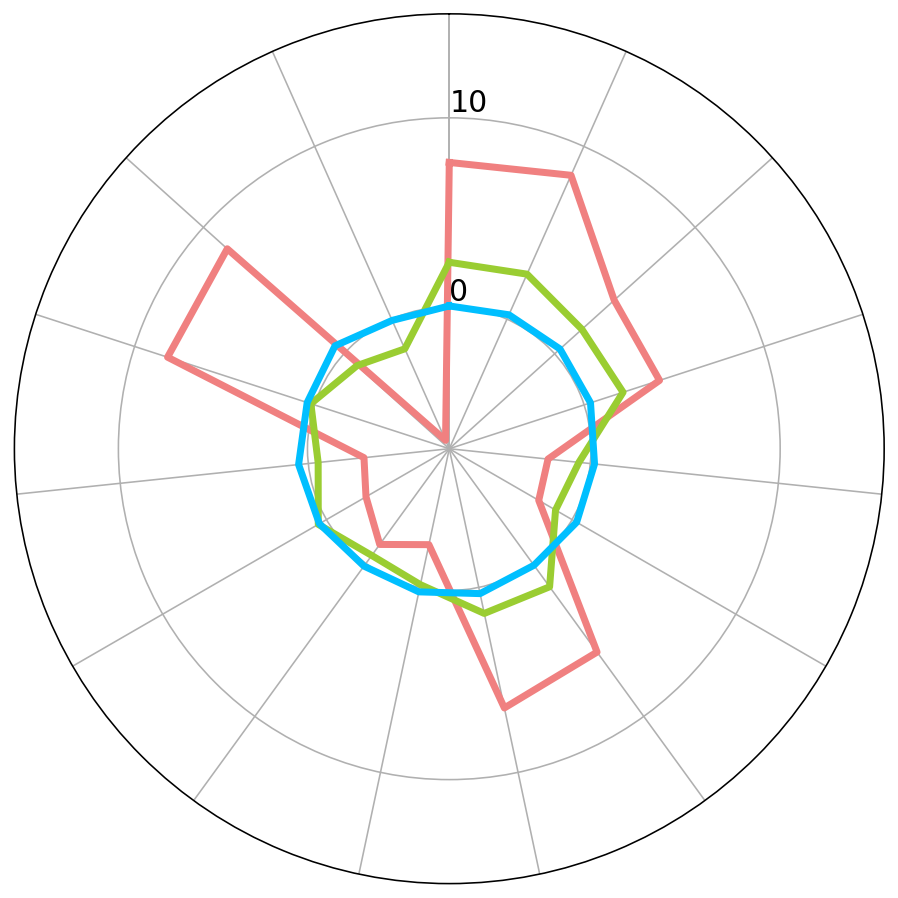

In [6]:
roiname = []
radar_hao_c(rois, roiname, -7.5, 15.5)

In [7]:
def radar_hao_a(rois,roiname,lmin,lmax):    
    res_AA = pd.merge(res_behav_Adult, res_beta_A, how='inner', on = "Scan_ID")
    res_AO = pd.merge(res_behav_Adult, res_beta_O, how='inner', on = "Scan_ID")
    res_AC = pd.merge(res_behav_Adult, res_beta_C, how='inner', on = "Scan_ID")
    res_A = pd.DataFrame([np.mean(res_AA[rois]),np.mean(res_AO[rois]),np.mean(res_AC[rois])])
    
    fig_set = mplt.figure(figsize=(8,8))
    # number of variable
    N = len(list(res_A)[0:])
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    # Initialise the spider plot
    ax = mplt.subplot(111, polar=True)
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels labels yet
    mplt.xticks(angles, roiname, size=8)
    # Draw ylabelsradar_hao_c(rois, roiname, -7,9.2)
    ax.set_rlabel_position(0)
    mplt.yticks([0,10], color="black", size=15)
    mplt.ylim(lmin,lmax)

    ## PART 2: Add plots
    values = res_A.loc[0].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Alert", color="lightcoral")

    values = res_A.loc[1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Orient", color="yellowgreen")

    values = res_A.loc[2].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=3.5, linestyle='solid', label="Executive", color="deepskyblue")
    
    #mplt.legend(loc='best', fontsize=15, bbox_to_anchor=(0, 0))
    mplt.savefig("C:/Users/haolei/Desktop/radar_a.png", dpi=600, transparent=True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


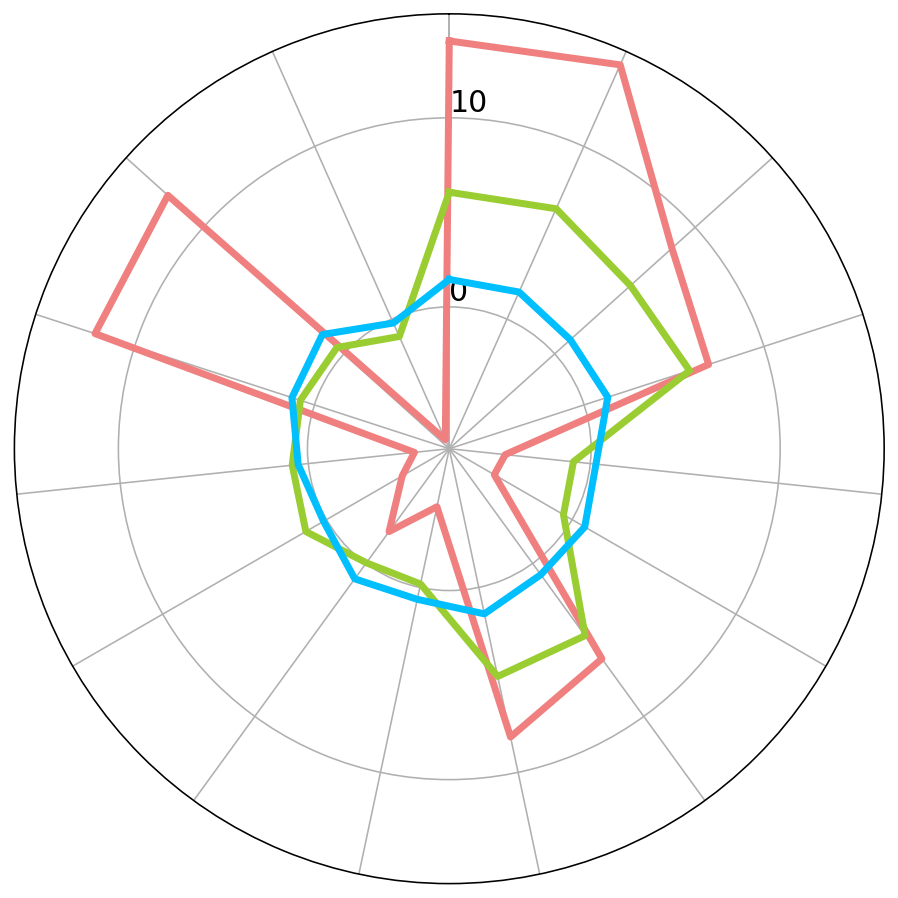

In [8]:
roiname = []
radar_hao_a(rois, roiname, -7.5, 15.5)